In [74]:
import pandas as pd 
pd.set_option('display.max_columns', 600)
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


In [75]:
df = pd.read_csv("/Users/jsc/Documents/Personal/Dev/ML Projects/Developer Salary /data/survey_results_public.csv")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [77]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              87973 non-null  object 
 1   EdLevel              87973 non-null  object 
 2   YearsCodePro         66136 non-null  object 
 3   Employment           87898 non-null  object 
 4   ConvertedCompYearly  48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [79]:
df = df.dropna()
df.isnull().sum()

Country                0
EdLevel                0
YearsCodePro           0
Employment             0
ConvertedCompYearly    0
dtype: int64

In [80]:
df['Employment'].value_counts()

Employed, full-time                                                                             39155
Independent contractor, freelancer, or self-employed                                             3880
Employed, full-time;Independent contractor, freelancer, or self-employed                         3282
Employed, part-time                                                                               899
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Retired                                                                                            33
I prefer not to say                                                                                33
Independent contractor, freelancer, or self-employed;Retired                      

In [81]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              39155 non-null  object 
 1   EdLevel              39155 non-null  object 
 2   YearsCodePro         39155 non-null  object 
 3   ConvertedCompYearly  39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [83]:
df['Country'].value_counts()

United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

Some countries with very few data points is not possible to predict so we need to combine these into an 'other' category

In [84]:
def clean_country(categories, cutoff):
    cat_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            cat_map[categories.index[i]] = categories.index[i]
        else:
            cat_map[categories.index[i]] = 'Other'
    return cat_map 
    

In [85]:
country_map = clean_country(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Israel'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Other'),
  Text(13, 0, 'Poland'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(18, 0, 'United States of America')])

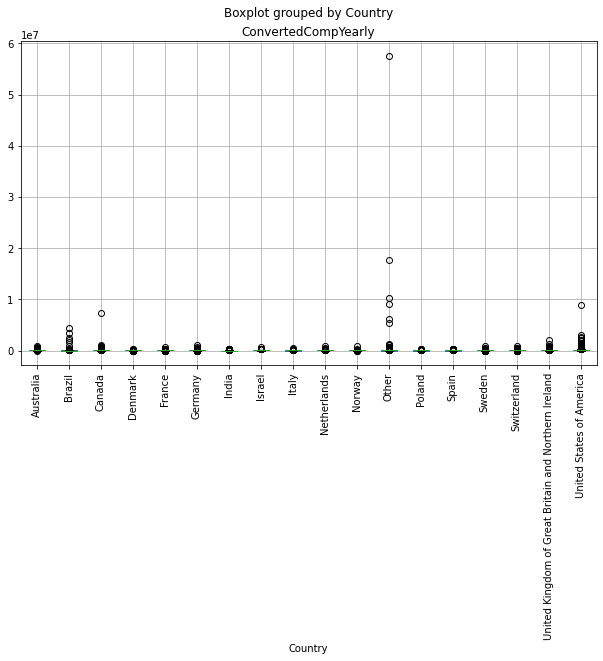

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.xticks(rotation=90)

In [87]:
df =df[df['ConvertedCompYearly']<250000]
df = df[df['ConvertedCompYearly']>20000]
df = df[df['Country'] != 'Other']   

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Israel'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Poland'),
  Text(13, 0, 'Spain'),
  Text(14, 0, 'Sweden'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(17, 0, 'United States of America')])

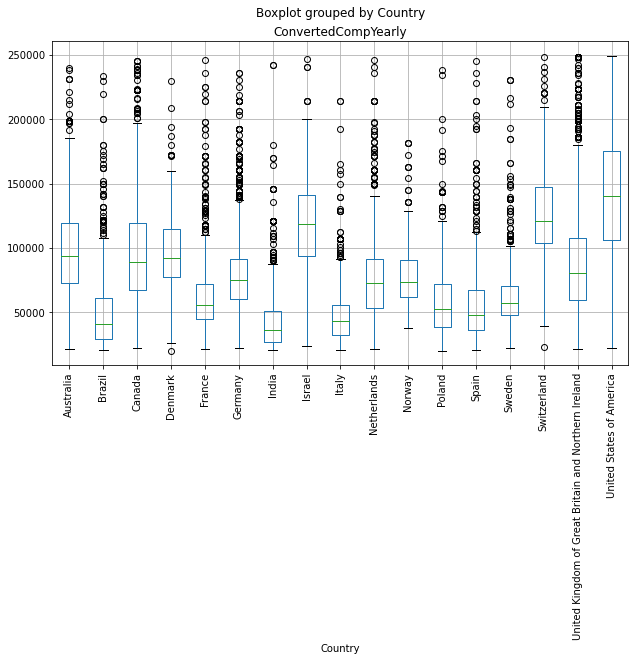

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.xticks(rotation=90)

In [89]:
df['YearsCodePro'].unique()

array(['7', '21', '3', '9', 'Less than 1 year', '10', '2', '6', '14', '5',
       '15', '19', '13', '16', '28', '24', '25', '12', '4', '20', '8',
       '18', '30', '27', '23', '17', '43', '38', '33', '22', '1', '11',
       '34', '42', '26', '31', '36', '39', '29', '40', '32', '44', '37',
       '35', '48', 'More than 50 years', '45', '41', '50', '46', '49',
       '47'], dtype=object)

In [90]:
def clean_YCP(YCP):
    if YCP == 'Less than 1 year':
        return 0.5
    if YCP == 'More than 50 years':
        return 50
    return float(YCP)

In [91]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_YCP)

In [92]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [93]:
def clean_experience(experience):
    if 'Bachelor’s degree' in experience:
        return 'Bachelor’s degree'
    if 'Master’s degree' in experience:
        return 'Master’s degree'
    if 'Professional degree' in experience or 'doctoral' in experience:
        return 'Post grad'
    return 'Less than a Bachelors'
df['EdLevel'] = df['EdLevel'].apply(clean_experience)

In [94]:
df.head()

,Country,EdLevel,YearsCodePro,ConvertedCompYearly
3,United States of America,Bachelor’s degree,7.0,156000.0
5,United Kingdom of Great Britain and Northern I...,Less than a Bachelors,21.0,96828.0
6,United States of America,Less than a Bachelors,3.0,135000.0
7,United States of America,Bachelor’s degree,3.0,80000.0
11,Australia,Bachelor’s degree,9.0,78003.0


In [95]:
from sklearn.preprocessing import LabelEncoder
le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])

In [96]:
le_c = LabelEncoder()
df['Country'] = le_c.fit_transform(df['Country']) 

In [97]:
X = df.drop('ConvertedCompYearly', axis=1)
y = df['ConvertedCompYearly']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

35408.35152407352

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [109]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

33547.373856288934

In [111]:
import pickle
data = {"model": regressor, "le_country": le_c, "le_education": le_ed}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [112]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]